## Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

In [2]:
#Loading main HR dataset
data = pd.read_csv("Dataset/hr_data.csv")
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
data.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
#Loading satisfaction and evaluation dataset
emp_sat = pd.read_excel("Dataset/employee_satisfaction_evaluation.xlsx")
emp_sat.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [6]:
emp_sat.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


In [7]:
emp_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [8]:
#merging main hr dataset with satisfaction & evaluation dataset
dataset = data.set_index('employee_id').join(emp_sat.set_index('EMPLOYEE #'))
dataset = dataset.reset_index()
dataset.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [9]:
dataset[dataset.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [10]:
#replace missing values with mean
dataset.fillna(dataset.mean(), inplace=True)

In [11]:
dataset.loc[dataset['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [12]:
dataset = dataset.drop(columns = 'employee_id')
dataset.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [13]:
#One hot encoding on categorical data
categorial = ['department','salary']
dataset = pd.get_dummies(dataset, columns=categorial, drop_first=True)
dataset.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [14]:
dataset.columns.tolist()

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'satisfaction_level',
 'last_evaluation',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium']

In [15]:
#change columns order
dataset = dataset[['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'satisfaction_level',
 'last_evaluation',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium', 'left',]]

In [16]:
dataset.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
0,2,157,3,0,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0,1
1,5,262,6,0,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1,1
2,7,272,4,0,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1,1
3,5,223,5,0,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0,1
4,2,159,3,0,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0,1


## Correlation Matrix

<AxesSubplot:>

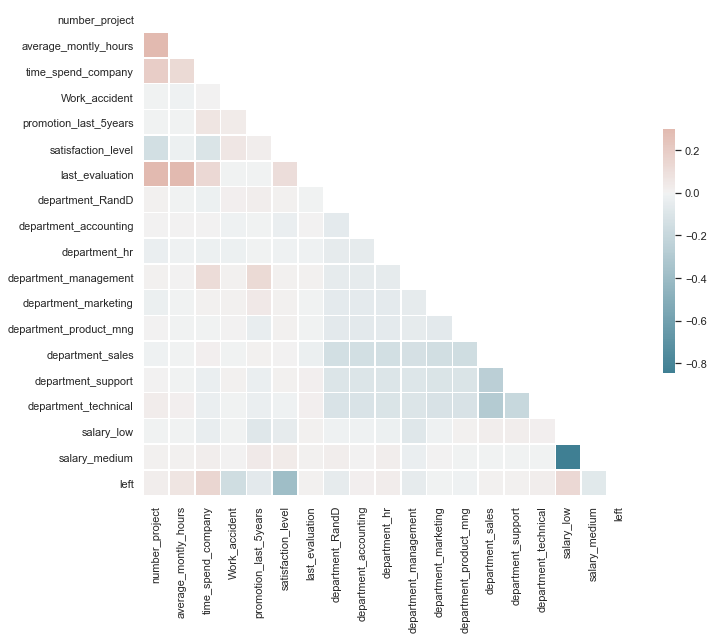

In [17]:
corr = dataset.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting dataset into training and test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model training and evaluating

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [22]:
pipeline_lr = Pipeline([('LogisticRegression', LogisticRegression())])
pipeline_svc = Pipeline([('SVC', SVC())])
pipeline_knn = Pipeline([('KNN', KNeighborsClassifier())])
pipeline_nb = Pipeline([('NaiveBayes', GaussianNB())])
pipeline_dt = Pipeline([('DecisionTree', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('RandomForest', RandomForestClassifier())])
pipeline_cat = Pipeline([('CatBoost', CatBoostClassifier())])

In [23]:
pipelines = [pipeline_lr, pipeline_svc, pipeline_knn, pipeline_nb, pipeline_dt, pipeline_rf, pipeline_cat]

In [24]:
best_score = 0.0
best_classifier = 0
best_pipeline = ""

In [25]:
pipe_dict = {0:'LogisticRegression', 1:'SVC', 2:'KNN', 3:'NaiveBayes', 4:'DecisionTree', 5: 'RandomForest', 6:'CatBoost'}

for pipe in pipelines:
    pipe.fit(x_train,y_train)

Learning rate set to 0.029767
0:	learn: 0.6455957	total: 64.9ms	remaining: 1m 4s
1:	learn: 0.6004775	total: 74.3ms	remaining: 37.1s
2:	learn: 0.5585729	total: 84.2ms	remaining: 28s
3:	learn: 0.5225559	total: 93.2ms	remaining: 23.2s
4:	learn: 0.4910565	total: 103ms	remaining: 20.4s
5:	learn: 0.4586878	total: 112ms	remaining: 18.6s
6:	learn: 0.4306760	total: 121ms	remaining: 17.2s
7:	learn: 0.4048746	total: 130ms	remaining: 16.1s
8:	learn: 0.3808531	total: 139ms	remaining: 15.3s
9:	learn: 0.3598890	total: 148ms	remaining: 14.7s
10:	learn: 0.3405999	total: 157ms	remaining: 14.1s
11:	learn: 0.3233714	total: 167ms	remaining: 13.7s
12:	learn: 0.3079902	total: 176ms	remaining: 13.3s
13:	learn: 0.2940881	total: 185ms	remaining: 13s
14:	learn: 0.2812454	total: 197ms	remaining: 12.9s
15:	learn: 0.2685322	total: 206ms	remaining: 12.7s
16:	learn: 0.2576377	total: 215ms	remaining: 12.5s
17:	learn: 0.2472295	total: 224ms	remaining: 12.2s
18:	learn: 0.2375792	total: 233ms	remaining: 12s
19:	learn: 0.

177:	learn: 0.0783821	total: 1.82s	remaining: 8.4s
178:	learn: 0.0782598	total: 1.83s	remaining: 8.39s
179:	learn: 0.0780969	total: 1.84s	remaining: 8.38s
180:	learn: 0.0779944	total: 1.85s	remaining: 8.36s
181:	learn: 0.0777856	total: 1.86s	remaining: 8.35s
182:	learn: 0.0776840	total: 1.87s	remaining: 8.33s
183:	learn: 0.0775061	total: 1.88s	remaining: 8.32s
184:	learn: 0.0773700	total: 1.88s	remaining: 8.3s
185:	learn: 0.0772453	total: 1.89s	remaining: 8.29s
186:	learn: 0.0770501	total: 1.9s	remaining: 8.27s
187:	learn: 0.0768828	total: 1.91s	remaining: 8.26s
188:	learn: 0.0767587	total: 1.92s	remaining: 8.24s
189:	learn: 0.0766700	total: 1.93s	remaining: 8.23s
190:	learn: 0.0765783	total: 1.94s	remaining: 8.21s
191:	learn: 0.0764553	total: 1.95s	remaining: 8.19s
192:	learn: 0.0763313	total: 1.96s	remaining: 8.18s
193:	learn: 0.0762492	total: 1.96s	remaining: 8.16s
194:	learn: 0.0762066	total: 1.97s	remaining: 8.14s
195:	learn: 0.0760316	total: 1.98s	remaining: 8.12s
196:	learn: 0.0

354:	learn: 0.0600856	total: 3.88s	remaining: 7.05s
355:	learn: 0.0599669	total: 3.89s	remaining: 7.04s
356:	learn: 0.0599185	total: 3.9s	remaining: 7.02s
357:	learn: 0.0598020	total: 3.91s	remaining: 7.01s
358:	learn: 0.0597220	total: 3.92s	remaining: 7s
359:	learn: 0.0596708	total: 3.93s	remaining: 6.98s
360:	learn: 0.0595646	total: 3.94s	remaining: 6.97s
361:	learn: 0.0594528	total: 3.95s	remaining: 6.96s
362:	learn: 0.0594015	total: 3.97s	remaining: 6.96s
363:	learn: 0.0593085	total: 3.98s	remaining: 6.96s
364:	learn: 0.0592403	total: 4s	remaining: 6.95s
365:	learn: 0.0591804	total: 4.01s	remaining: 6.95s
366:	learn: 0.0590468	total: 4.02s	remaining: 6.94s
367:	learn: 0.0589955	total: 4.04s	remaining: 6.93s
368:	learn: 0.0589074	total: 4.05s	remaining: 6.92s
369:	learn: 0.0588266	total: 4.06s	remaining: 6.92s
370:	learn: 0.0586967	total: 4.08s	remaining: 6.92s
371:	learn: 0.0586103	total: 4.1s	remaining: 6.92s
372:	learn: 0.0585487	total: 4.11s	remaining: 6.91s
373:	learn: 0.058439

520:	learn: 0.0483950	total: 5.87s	remaining: 5.4s
521:	learn: 0.0483623	total: 5.89s	remaining: 5.39s
522:	learn: 0.0482957	total: 5.91s	remaining: 5.39s
523:	learn: 0.0482310	total: 5.92s	remaining: 5.38s
524:	learn: 0.0482094	total: 5.93s	remaining: 5.37s
525:	learn: 0.0481778	total: 5.94s	remaining: 5.35s
526:	learn: 0.0481170	total: 5.95s	remaining: 5.34s
527:	learn: 0.0480831	total: 5.97s	remaining: 5.33s
528:	learn: 0.0480076	total: 5.98s	remaining: 5.32s
529:	learn: 0.0479488	total: 5.99s	remaining: 5.31s
530:	learn: 0.0479015	total: 6s	remaining: 5.3s
531:	learn: 0.0478321	total: 6.02s	remaining: 5.29s
532:	learn: 0.0477777	total: 6.03s	remaining: 5.28s
533:	learn: 0.0477375	total: 6.04s	remaining: 5.27s
534:	learn: 0.0477041	total: 6.05s	remaining: 5.26s
535:	learn: 0.0475713	total: 6.06s	remaining: 5.25s
536:	learn: 0.0475176	total: 6.08s	remaining: 5.24s
537:	learn: 0.0474863	total: 6.09s	remaining: 5.23s
538:	learn: 0.0474304	total: 6.1s	remaining: 5.22s
539:	learn: 0.0473

691:	learn: 0.0398570	total: 7.47s	remaining: 3.33s
692:	learn: 0.0397967	total: 7.48s	remaining: 3.31s
693:	learn: 0.0397724	total: 7.49s	remaining: 3.3s
694:	learn: 0.0397340	total: 7.5s	remaining: 3.29s
695:	learn: 0.0397045	total: 7.51s	remaining: 3.28s
696:	learn: 0.0396645	total: 7.52s	remaining: 3.27s
697:	learn: 0.0396285	total: 7.53s	remaining: 3.26s
698:	learn: 0.0396002	total: 7.54s	remaining: 3.25s
699:	learn: 0.0395914	total: 7.54s	remaining: 3.23s
700:	learn: 0.0395428	total: 7.55s	remaining: 3.22s
701:	learn: 0.0395177	total: 7.56s	remaining: 3.21s
702:	learn: 0.0394812	total: 7.57s	remaining: 3.2s
703:	learn: 0.0394313	total: 7.58s	remaining: 3.19s
704:	learn: 0.0393986	total: 7.59s	remaining: 3.17s
705:	learn: 0.0393731	total: 7.6s	remaining: 3.16s
706:	learn: 0.0393411	total: 7.6s	remaining: 3.15s
707:	learn: 0.0392873	total: 7.61s	remaining: 3.14s
708:	learn: 0.0392426	total: 7.62s	remaining: 3.13s
709:	learn: 0.0392166	total: 7.63s	remaining: 3.12s
710:	learn: 0.039

871:	learn: 0.0333209	total: 9.06s	remaining: 1.33s
872:	learn: 0.0332802	total: 9.07s	remaining: 1.32s
873:	learn: 0.0332570	total: 9.08s	remaining: 1.31s
874:	learn: 0.0332373	total: 9.1s	remaining: 1.3s
875:	learn: 0.0332153	total: 9.1s	remaining: 1.29s
876:	learn: 0.0331932	total: 9.11s	remaining: 1.28s
877:	learn: 0.0331755	total: 9.12s	remaining: 1.27s
878:	learn: 0.0331421	total: 9.13s	remaining: 1.26s
879:	learn: 0.0330999	total: 9.14s	remaining: 1.25s
880:	learn: 0.0330793	total: 9.15s	remaining: 1.24s
881:	learn: 0.0330618	total: 9.16s	remaining: 1.23s
882:	learn: 0.0330189	total: 9.17s	remaining: 1.22s
883:	learn: 0.0329862	total: 9.18s	remaining: 1.2s
884:	learn: 0.0329520	total: 9.19s	remaining: 1.19s
885:	learn: 0.0329352	total: 9.2s	remaining: 1.18s
886:	learn: 0.0328953	total: 9.21s	remaining: 1.17s
887:	learn: 0.0328314	total: 9.22s	remaining: 1.16s
888:	learn: 0.0328087	total: 9.23s	remaining: 1.15s
889:	learn: 0.0327753	total: 9.24s	remaining: 1.14s
890:	learn: 0.032

In [26]:
for i,model in enumerate (pipelines):
    print("{}, Accuracy Score: {}".format(pipe_dict[i],model.score(x_test,y_test)))

LogisticRegression, Accuracy Score: 0.788
SVC, Accuracy Score: 0.9503333333333334
KNN, Accuracy Score: 0.9403333333333334
NaiveBayes, Accuracy Score: 0.7423333333333333
DecisionTree, Accuracy Score: 0.9823333333333333
RandomForest, Accuracy Score: 0.991
CatBoost, Accuracy Score: 0.9853333333333333


In [27]:
for i, model in enumerate(pipelines):
    if model.score(x_test,y_test) > best_score:
        best_score = model.score(x_test,y_test)
        best_pipeline = model
        best_classifier = i

print('Classifier with best score: {}'.format(pipe_dict[best_classifier]))

Classifier with best score: RandomForest


In [28]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {0:.2f}%'.format(100 * accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

[[2293    6]
 [  20  681]]
Accuracy: 99.13%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.97      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000

